In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

In [2]:
def get_data():
    data = np.loadtxt("iris.txt")
    iris_data = data[50:]
    return iris_data 

def get_bias(train_data, C12, C21): 
    N1 = 25
    N2 = len(train_data) - 25

    pi1 = N1 / (N1 + N2)
    pi2 = N2 / (N1 + N2)

    sigma = get_sigma(train_data)

    vector_u1, vector_u2 = get_vector_u1_and_u2(train_data_positive, train_data_negative)

    bias = (-0.5 * (((vector_u1 - vector_u2).T).dot(np.linalg.inv(sigma))).dot(vector_u1 + vector_u2)) - (np.log((C12 * pi2) / (C21 * pi1)))

    return(bias)

def get_sigma(train_data):
    sigma = 0
    n = len(train_data)
    vector_u = np.mean(train_data, axis=0)

    for i in range(n):
        sigma += (train_data[i] - vector_u).dot((train_data[i] - vector_u).T)

    sigma = 1 / (n - 1) * sigma
    return(sigma)

def get_w1_and_w2_b():
    weight = get_weight()
    bias = get_bias(train_data, C12, C21)
    w1 = weight[0, 0]
    w2 = weight[0, 1] 
    b = bias[0,0]

    return(w1, w2, b)

In [3]:
def get_train_and_test(feature):
    iris_data = get_data()

    positive_data = iris_data[:50, feature]
    positive_data = np.expand_dims(positive_data, axis=2)

    negative_data = iris_data[50:, feature]
    negative_data = np.expand_dims(negative_data, axis=2)

    train_data_positive = positive_data[:25]
    train_data_negative = negative_data[:25]

    test_data_positive = positive_data[25:]
    test_data_negative = negative_data[25:]

    train_data = np.concatenate((train_data_positive, train_data_negative), axis=0)
    test_data = np.concatenate((test_data_positive, test_data_negative), axis=0)

    train_label = ['positive'] * len(train_data_positive) + ['negative'] * len(train_data_negative)
    test_label = ['positive'] * len(test_data_positive) + ['negative'] * len(test_data_negative)

    return(train_data, test_data, train_label, test_label, 
            train_data_positive, train_data_negative, test_data_positive, test_data_negative)

def get_test_and_train(feature):
    iris_data = get_data()

    positive_data = iris_data[:50, feature]
    positive_data = np.expand_dims(positive_data, axis=2)

    negative_data = iris_data[50:, feature]
    negative_data = np.expand_dims(negative_data, axis=2)

    train_data_positive = positive_data[25:]
    train_data_negative = negative_data[25:]

    test_data_positive = positive_data[:25]
    test_data_negative = negative_data[:25]

    train_data = np.concatenate((train_data_positive, train_data_negative), axis=0)
    test_data = np.concatenate((test_data_positive, test_data_negative), axis=0)

    train_label = ['positive'] * len(train_data_positive) + ['negative'] * len(train_data_negative)
    test_label = ['positive'] * len(test_data_positive) + ['negative'] * len(test_data_negative)

    return(train_data, test_data, train_label, test_label, 
            train_data_positive, train_data_negative, test_data_positive, test_data_negative)

In [4]:
def get_vector_u1_and_u2(train_data_positive, train_data_negative):
    vector_u1 = np.mean(train_data_positive, axis=0)
    vector_u2 = np.mean(train_data_negative, axis=0)
    return(vector_u1, vector_u2)

def get_weight():
    sigma = get_sigma(train_data)
    vector_u1, vector_u2 = get_vector_u1_and_u2(train_data_positive, train_data_negative)
    vector_w = (vector_u1 - vector_u2).T.dot(np.linalg.inv(sigma))
    return(vector_w)

def get_slope():

    w1, w2, b = get_w1_and_w2_b()

    y1 = (-b - w1 * 0) / w2
    y2 = (-b - w1 * 1) / w2

    if y2 - y1 > 0:
        return 'positive'
    else:
        return 'negative'
        
def get_predict(test_data):
    TP, FN, FP, TN = 0, 0, 0, 0
    right_counts = 0

    w1, w2, b = get_w1_and_w2_b()

    for i in range(len(test_data)):

        x = test_data[i, 0]
        y = test_data[i, 1]

        hyperplane_height = (-b - w1 * x) / w2

        dis = hyperplane_height - y  

        predict = ''

        hyperplane_slope = get_slope()

        if hyperplane_slope == 'positive':
            if dis > 0:
                predict = 'negative'
            else:
                predict = 'positive'  
        else:
            if dis > 0:
                predict = 'positive'
            else:
                predict = 'negative'

        
        if predict == 'positive' :
            if test_label[i] == 'positive':
                TP += 1
                right_counts += 1
            else:
                FP += 1
        else:
            if test_label[i] == 'negative':
                TN += 1
                right_counts += 1
            else:
                FN += 1

    return TP, FP, TN, FN, right_counts

def get_acc_tpr_fpr(C12, C21):

    weight = get_weight()

    bias = get_bias(train_data, C12, C21)

    TP, FP, TN, FN, right_counts = get_predict(test_data)

    accuracy = (right_counts / len(test_data)) * 100
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    return TPR, FPR, accuracy

In [5]:
def get_feature():
    feature = [[0, 1],[2, 0],[3, 0],[2, 1],[3, 1],[2, 3]]

    # for i in range(3):
    #     for j in range(i+1, 4):
    #          feature.append([i, j])
    return feature
    
def get_tpr_fpr_acc(feature):
    C21 = 1

    TPR_S1 = []
    FPR_S1 = []
    ACC_S1 = []

    TPR_S2 = []
    FPR_S2 = []
    ACC_S2 = []

    train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative = get_train_and_test(feature)

    for i in range(-1000, 1001, 1):
        C12 = 1.05 ** i

        TPR_1, FPR_1, accuracy_1 = get_acc_tpr_fpr(C12, C21)

        TPR_S1.append(TPR_1)
        FPR_S1.append(FPR_1)
        ACC_S1.append(accuracy_1)

    train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative = get_test_and_train(feature)

    for j in range(-1000, 1001, 1):
        C12 = 1.05 ** j

        TPR_2, FPR_2, accuracy_2 = get_acc_tpr_fpr(C12, C21)

        TPR_S2.append(TPR_2)
        FPR_S2.append(FPR_2)
        ACC_S2.append(accuracy_2)

    return (TPR_S1, FPR_S1, ACC_S1, TPR_S2, FPR_S2, ACC_S2)

In [6]:
def get_hyperplane(train_data_positive, train_data_negative):
    w1, w2, b = get_w1_and_w2_b()

    y1 = (-b - w1 * 0) / w2
    y2 = (-b - w1 * 5) / w2

    plt.clf() 
    plt.cla()
    plt.close() 
    sns.set()
    
    plot_x = [0, 10]
    plot_y = [y1, y2]

    vector_x = []
    vector_y = []

    plt.plot([plot_x[0], plot_x[1]], [plot_y[0], plot_y[1]], color='red', marker='o',linestyle='dashed', linewidth=2, markersize=5)
    plt.xlabel("Feature 3")
    plt.ylabel("Feature 4")

    y_label = ['positive'] * len(train_data_positive) + ['negative'] * len(train_data_negative)
    

    for i in range(len(train_data_positive)):
        vector_x.append(train_data_positive[i, 0])
        vector_y.append(train_data_positive[i, 1])

        # plt.plot(vector_x, vector_y, 'bo')

    for j in range(len(train_data_negative)):
        vector_x.append(train_data_negative[j, 0])
        vector_y.append(train_data_negative[j, 1])

        # plt.plot(vector_x, vector_y, 'ro')

    sns.scatterplot(x=vector_x, y=vector_y, hue=y_label).set(xlabel='Feature 3', ylabel='Feature 4')
        
    return 


Weight is [-0.5869  -2.9432]
Bias is 7.9062
accuracy 94.0


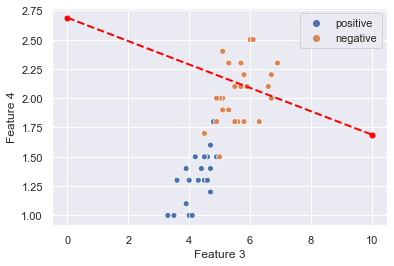

In [7]:
# part1_lda
# step5
feature = [2, 3]
C12, C21 = 1, 1

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative = get_train_and_test(feature)

TPR_1, FPR_1, accuracy_1 = get_acc_tpr_fpr(C12, C21)

weight = get_weight()
print("Weight is [{}  {}]".format(round(weight[0,0],4), round(weight[0,1],4)))

bias = get_bias(train_data, C12, C21)
print("Bias is {}".format(round(bias[0,0],4)))

TPR, FPR, accuracy = get_acc_tpr_fpr(C12, C21)
print("accuracy {}".format(accuracy))


hyperplane = get_hyperplane(train_data_positive, train_data_negative)

Weight is [-1.0435  -2.1946]
Bias is 8.6852
accuracy 94.0


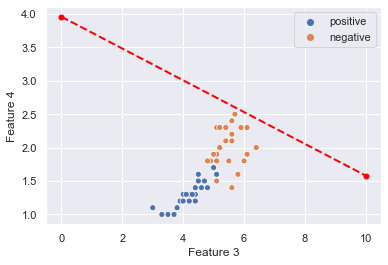

In [8]:
# part1_lda
#step6
train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative = get_test_and_train(feature)

TPR_2, FPR_2, accuracy_2 = get_acc_tpr_fpr(C12, C21)

weight = get_weight()
print("Weight is [{}  {}]".format(round(weight[0,0],4), round(weight[0,1],4)))

bias = get_bias(train_data, C12, C21)

print("Bias is {}".format(round(bias[0,0],4)))

TPR, FPR, accuracy = get_acc_tpr_fpr(C12, C21)
print("accuracy {}".format(accuracy))

hyperplane = get_hyperplane(train_data_positive, train_data_negative)

In [9]:
#step7
TPR = (TPR_1 + TPR_2) / 2 * 100
FPR = (FPR_1 + FPR_2) / 2 * 100
accuracy = ((accuracy_1 + accuracy_2) / 2) 

print("TPR is {}%".format(TPR))
print("FPR is {}%".format(FPR))
print("accuracy is {}%".format(accuracy))

TPR is 96.0%
FPR is 8.0%
accuracy is 94.0%


In [12]:
# part2_lda
# step3

feature = [1, 0]
C12, C21 = 1, 1

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative = get_train_and_test(feature)

TPR_1, FPR_1, accuracy_1 = get_acc_tpr_fpr(C12, C21)

print("TPR:{}".format(TPR_1))
print("FPR:{}".format(FPR_1))

TPR:1.0
FPR:1.0


In [13]:
# step4
train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative = get_test_and_train(feature)

TPR_2, FPR_2, accuracy_2 = get_acc_tpr_fpr(C12, C21)

print("TPR:{}".format(TPR_2))
print("FPR:{}".format(FPR_2))

TPR:0.0
FPR:0.0


In [14]:
# step5
TPR = (TPR_1 + TPR_2) / 2 
FPR = (FPR_1 + FPR_2) / 2 
accuracy = ((accuracy_1 + accuracy_2) / 2) 

print("TPR is {}".format(TPR))
print("FPR is {}".format(FPR))
print("accuracy is {}%".format(accuracy))

TPR is 0.5
FPR is 0.5
accuracy is 50.0%


[0, 1]


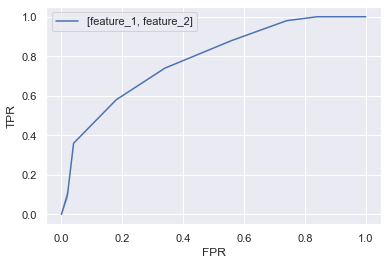

In [15]:
# step6
feature = [0,1]
print(feature)

C21 = 1

TPR_S1 = []
FPR_S1 = []
ACC_S1 = []

TPR_S2 = []
FPR_S2 = []
ACC_S2 = []

TPR = []
FPR = []
ACC = []

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative = get_train_and_test(feature)

for i in range(-1000, 1001, 1):
    C12 = 1.05 ** i

    TPR_1, FPR_1, accuracy_1 = get_acc_tpr_fpr(C12, C21)

    TPR_S1.append(TPR_1)
    FPR_S1.append(FPR_1)
    ACC_S1.append(accuracy_1)

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative = get_test_and_train(feature)

for i in range(-1000, 1001, 1):
    C12 = 1.05 ** i

    TPR_2, FPR_2, accuracy_2 = get_acc_tpr_fpr(C12, C21)

    TPR_S2.append(TPR_2)
    FPR_S2.append(FPR_2)
    ACC_S2.append(accuracy_2)

for j in range(len(TPR_S1)):
    TPR.append((TPR_S1[j] + TPR_S2[j]) / 2)
    FPR.append((FPR_S1[j] + FPR_S2[j]) / 2)
    ACC.append(((ACC_S1[j] + ACC_S2[j]) / 2) * 100)

sns.set()
plt.xlabel('FPR') 
plt.ylabel('TPR')
sns.lineplot(x=FPR, y=TPR, markers=True, dashes=False, label='[feature_{}, feature_{}]'.format(feature[0]+1, feature[1]+1))

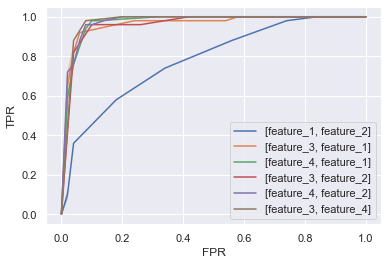

In [17]:
# step7
for index in range(len(get_feature())):
    feature = get_feature()[index]
    # print(feature)

    C21 = 1

    TPR_S1 = []
    FPR_S1 = []
    ACC_S1 = []

    TPR_S2 = []
    FPR_S2 = []
    ACC_S2 = []

    TPR = []
    FPR = []
    ACC = []

    train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative = get_train_and_test(feature)

    for i in range(-1000, 1001, 1):
        C12 = 1.05 ** i

        TPR_1, FPR_1, accuracy_1 = get_acc_tpr_fpr(C12, C21)

        TPR_S1.append(TPR_1)
        FPR_S1.append(FPR_1)
        ACC_S1.append(accuracy_1)

    train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative = get_test_and_train(feature)

    for i in range(-1000, 1001, 1):
        C12 = 1.05 ** i

        TPR_2, FPR_2, accuracy_2 = get_acc_tpr_fpr(C12, C21)

        TPR_S2.append(TPR_2)
        FPR_S2.append(FPR_2)
        ACC_S2.append(accuracy_2)

    for j in range(len(TPR_S1)):
        TPR.append((TPR_S1[j] + TPR_S2[j]) / 2)
        FPR.append((FPR_S1[j] + FPR_S2[j]) / 2)
        ACC.append(((ACC_S1[j] + ACC_S2[j]) / 2) * 100)

    sns.set()
    plt.xlabel('FPR') 
    plt.ylabel('TPR')
    sns.lineplot(x=FPR, y=TPR, markers=True, dashes=False, label='[feature_{}, feature_{}]'.format(feature[0]+1, feature[1]+1))